In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
#edit the file location of raw data set
cust_df = pd.read_csv(r'C:\Users\Dkalyani\AINE AI - Intern\Telecom Data - Machine Learning\Telecom Data - Machine Learning\Telecom Data.csv')
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [8]:
#shape of the data i.e. no. of rows and columns
cust_df.shape

(51047, 58)

In [9]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [10]:
#all the column names in the dataset
cust_df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [11]:
#total number of null values in each column
cust_df.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [12]:
zero_monthlyrev = len(cust_df[cust_df.MonthlyRevenue == 0].index)
zero_monthlyrev

6

In [13]:
#missing value percentage
missing_val_per = cust_df.isnull().sum() / cust_df.shape[0] * 100
missing_val_per

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.305601
MonthlyMinutes               0.305601
TotalRecurringCharge         0.305601
DirectorAssistedCalls        0.305601
OverageMinutes               0.305601
RoamingCalls                 0.305601
PercChangeMinutes            0.718945
PercChangeRevenues           0.718945
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

In [14]:
missing_val_5per = missing_val_per[missing_val_per > 5].keys()
missing_val_5per

Index([], dtype='object')

In [15]:
#dropping the rows with null values
cust_df = cust_df.dropna()

In [16]:
#checking the number of null values at current state
cust_df.isnull().sum().sum()

0

<AxesSubplot:>

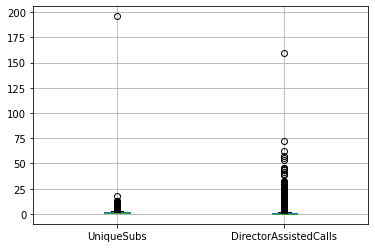

In [17]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

In [18]:
#top 1% of the values
qValue = [i/100 for i in range(95,101,1)] 
cust_df[cols].quantile(qValue)

,UniqueSubs,DirectorAssistedCalls
0.95,3.0,4.21
0.96,3.0,4.70
0.97,4.0,5.45
0.98,4.0,6.93
0.99,5.0,9.65
1.00,196.0,159.39


In [19]:
min_thres, max_thres = cust_df.UniqueSubs.quantile([0.000,0.95])
min_thres, max_thres

(1.0, 3.0)

In [20]:
#records below the minimum threshold of UniqueSubs
cust_df[cust_df.UniqueSubs<min_thres]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus


In [21]:
#records above the maximum threshold of UniqueSubs
cust_df[cust_df.UniqueSubs>max_thres]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
11,3000058,No,212.51,1972.0,85.0,2.23,250.0,35.5,-200.0,-106.8,...,0,3,No,1,80,No,4-Medium,Suburban,Other,No
30,3000190,Yes,78.29,852.0,85.0,0.00,0.0,0.0,-206.0,0.0,...,0,5,No,0,10,No,1-Highest,Town,Crafts,Yes
61,3000406,No,114.13,1650.0,83.0,1.73,52.0,0.0,-177.0,17.9,...,0,4,No,0,130,No,1-Highest,Other,Clerical,No
65,3000422,No,95.17,161.0,89.0,0.00,0.0,0.0,78.0,34.0,...,0,0,No,0,30,No,1-Highest,Town,Other,Unknown
66,3000426,Yes,90.61,1151.0,95.0,0.25,22.0,0.0,225.0,-5.6,...,0,0,No,0,30,No,1-Highest,Other,Other,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50542,3395946,Yes,30.00,130.0,30.0,0.00,0.0,0.0,138.0,0.0,...,0,9,No,0,30,No,1-Highest,Suburban,Other,Yes
50547,3395990,No,27.74,148.0,32.0,0.25,0.0,0.0,24.0,-0.2,...,0,8,No,0,30,No,1-Highest,Other,Clerical,Yes
50583,3396298,No,51.15,209.0,50.0,0.99,0.0,0.2,95.0,0.5,...,0,7,No,0,30,No,1-Highest,Suburban,Other,Yes
50584,3396302,No,69.04,974.0,60.0,0.99,20.0,0.0,-49.0,-17.1,...,0,7,No,0,60,No,1-Highest,Other,Other,Yes


In [22]:
#refining the the dataset with values present within the threshold limits of UniqueSubs
cust_df = cust_df[(cust_df.UniqueSubs<max_thres) & (cust_df.UniqueSubs>=min_thres)]
cust_df.shape

(44842, 58)

In [23]:
#threshold limits for DirectorAssistedCalls
min_thres1, max_thres1 = cust_df.DirectorAssistedCalls.quantile([0.000,0.95])
min_thres1, max_thres1

(0.0, 4.21)

In [24]:
#refining the the dataset with values present within the threshold limits of DirectorAssistedCalls
cust_df = cust_df[(cust_df.DirectorAssistedCalls<max_thres1) & (cust_df.DirectorAssistedCalls>=min_thres1)]
cust_df.shape

(42566, 58)

<AxesSubplot:>

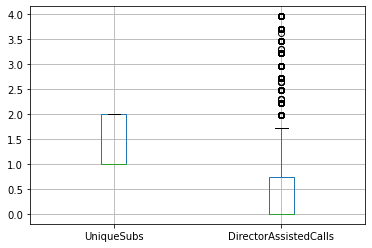

In [25]:
#checking the boxplot for outliers again
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

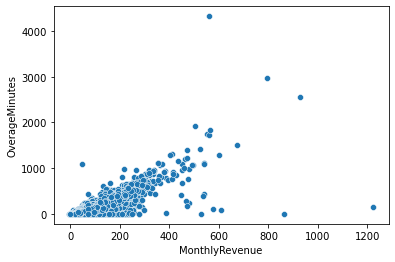

In [26]:
#scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)

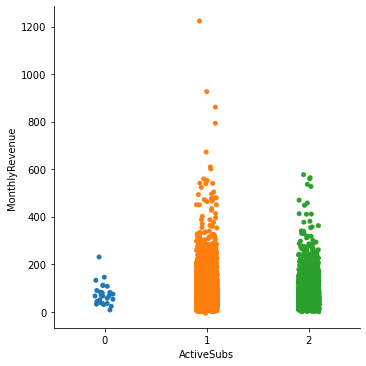

In [27]:
#category plot to plot monthly revenue for each active subs category
sns.catplot(x='ActiveSubs',y ='MonthlyRevenue',data=cust_df)

In [28]:
pd.crosstab(cust_df.CreditRating, cust_df.Churn)

Churn,No,Yes
CreditRating,,
1-Highest,4508,1998
2-High,11484,4936
3-Good,4630,2011
4-Medium,3526,1221
5-Low,4390,1194
6-VeryLow,541,188
7-Lowest,1383,556


<AxesSubplot:xlabel='Churn', ylabel='count'>

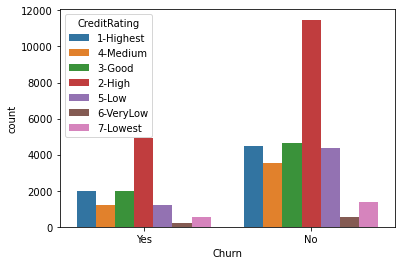

In [29]:
sns.countplot(x='Churn',hue='CreditRating',data=cust_df)

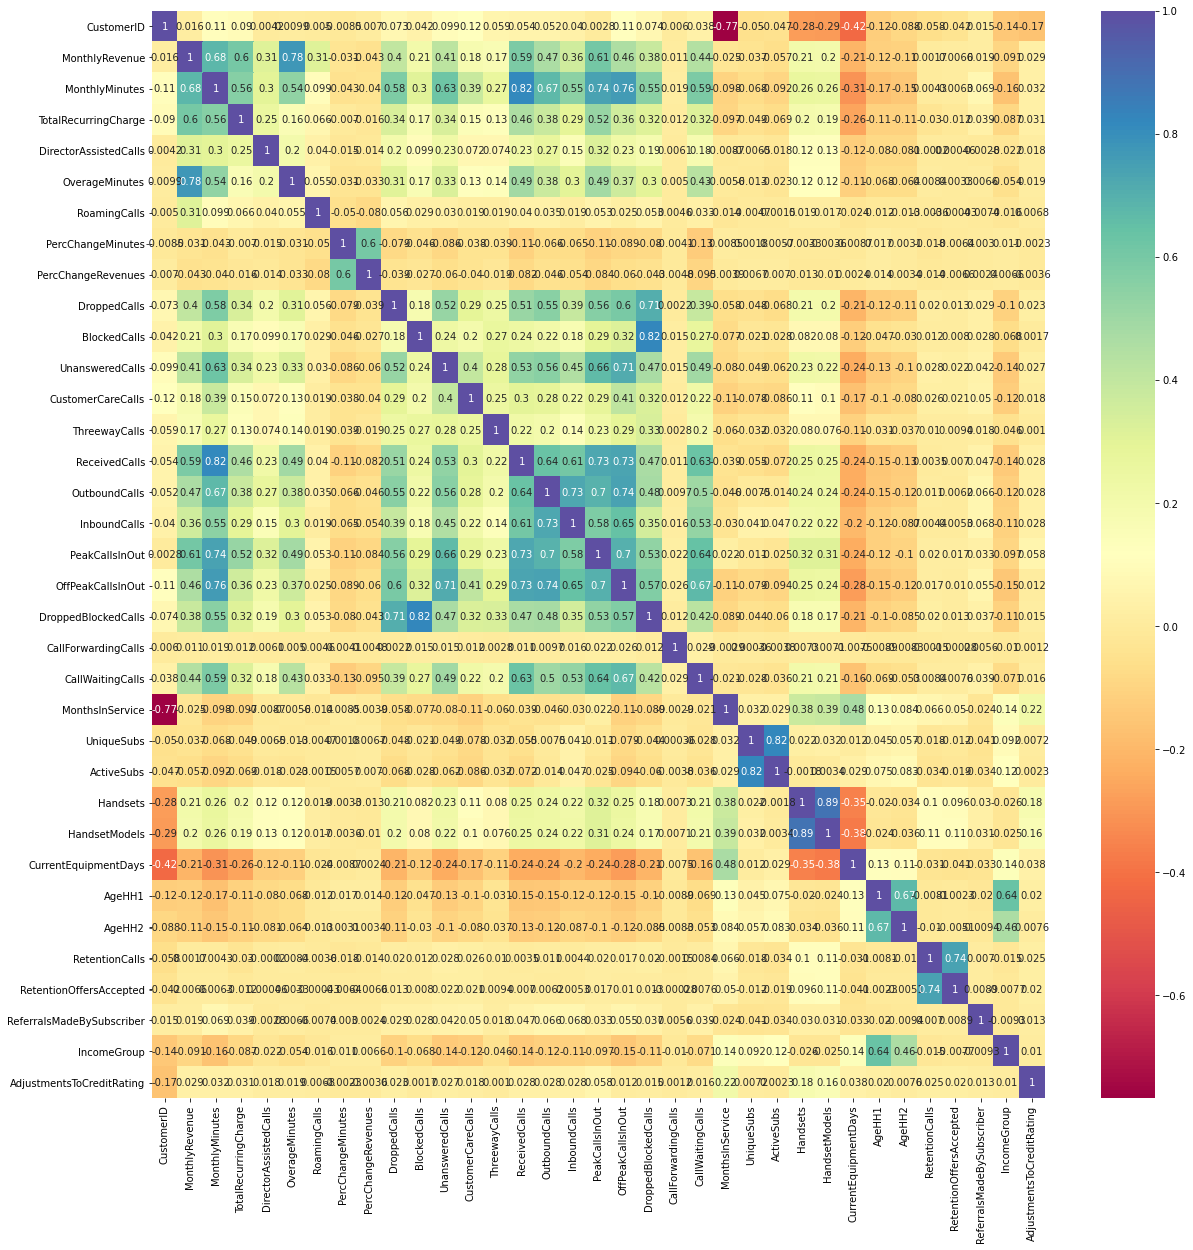

In [30]:
# calculating correlation among numeric variable
corr_matrix = cust_df.corr()

# plot correlation matrix
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix,cmap='Spectral',annot=True);

<AxesSubplot:xlabel='Churn', ylabel='count'>

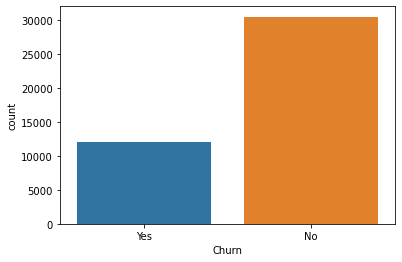

In [31]:
#a count check for the categorical variable
sns.countplot(x="Churn",data=cust_df)
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

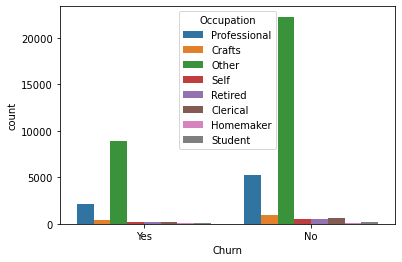

In [32]:
sns.countplot(x="Churn",hue="Occupation",data=cust_df)

In [34]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge'] = cust_df['TotalRecurringCharge']/cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_avg_minutes'] = cust_df['OverageMinutes']/cust_df['MonthlyMinutes']
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    
    return cust_df

In [35]:
#adding the new features in the main dataset
cust_df=create_features(cust_df)
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_avg_minutes
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,30,Yes,1-Highest,Suburban,Professional,No,0.5,0.916667,0.000000
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,30,No,4-Medium,Suburban,Professional,Yes,1.0,1.000589,0.000000
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,Unknown,No,3-Good,Town,Crafts,Yes,1.0,1.000000,0.000000
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,10,No,4-Medium,Other,Other,No,1.0,0.911522,0.000000
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,1,10,No,1-Highest,Other,Professional,Yes,1.0,0.991832,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51035,3399894,No,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,...,0,Unknown,No,2-High,Other,Professional,No,1.0,inf,0.000000
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,Unknown,No,3-Good,Other,Other,Yes,1.0,0.532581,0.682540
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,Unknown,No,1-Highest,Other,Professional,Unknown,1.0,0.972357,0.005525
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,30,No,5-Low,Other,Professional,Yes,1.0,0.255341,0.651042


In [36]:
# List of variables to map

varlist =  ['Churn']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
cust_df[varlist] = cust_df[varlist].apply(binary_map)



cust_df.Churn

0        1
1        1
2        0
3        0
4        1
        ..
51035    0
51037    0
51040    0
51041    1
51043    0
Name: Churn, Length: 42566, dtype: int64

In [37]:
cust_df.isnull().sum()

CustomerID                 0
Churn                      0
MonthlyRevenue             0
MonthlyMinutes             0
TotalRecurringCharge       0
                        ... 
Occupation                 0
MaritalStatus              0
perc_active_subs           0
perc_recurrent_charge      3
perc_avg_minutes         578
Length: 61, dtype: int64

In [38]:
cust_df = cust_df.dropna()

In [39]:
cust_df.isnull().sum()

CustomerID               0
Churn                    0
MonthlyRevenue           0
MonthlyMinutes           0
TotalRecurringCharge     0
                        ..
Occupation               0
MaritalStatus            0
perc_active_subs         0
perc_recurrent_charge    0
perc_avg_minutes         0
Length: 61, dtype: int64

In [40]:
#replacing infinite values if any
cust_df.replace({-np.inf: -1_000_000, np.inf: 1_000_000}, inplace=True)

In [41]:
count_class_0, count_class_1 = cust_df.Churn.value_counts()

df_class_0 = cust_df[cust_df['Churn']==0]
df_class_1 = cust_df[cust_df['Churn']==1]

In [42]:
df_class_0.shape

(30227, 61)

In [43]:
df_class_1.shape

(11759, 61)

In [44]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    30227
0    30227
Name: Churn, dtype: int64


In [45]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
X = df_test_over.drop(columns=['Churn'])
#Create dummy variables for all categorical variables
X = pd.get_dummies(X)


y = df_test_over['Churn']

In [46]:
#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [48]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred = log_reg.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

#accuracy score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.5956883718365772

In [51]:
#confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[5360, 3671],
       [3662, 5444]], dtype=int64)

In [52]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [53]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.5956883718365772

In [54]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.5935112390654412

In [55]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.5941033030370206

In [56]:
f1=2*((Precision * Recall )) /(Precision + Recall)
f1

0.5938071234697834

In [57]:
from sklearn.metrics import  roc_curve, roc_auc_score

# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.5956794060471068

In [58]:
y_pred_prob = log_reg.predict_proba(X_test)
y_pred_prob[:,1]

array([0.50187474, 0.59571425, 0.44541673, ..., 0.47228206, 0.31375335,
       0.41200679])

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

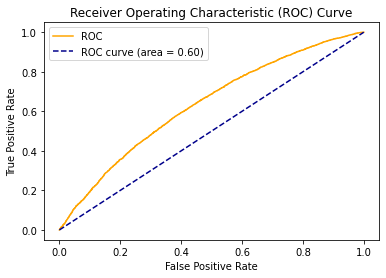

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)
average_precision

0.5589765107772096

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.56')

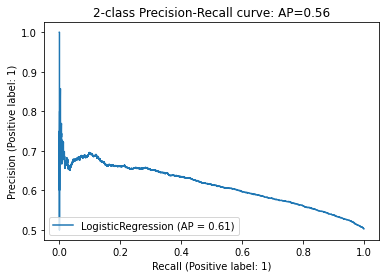

In [61]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(log_reg, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [66]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

RandomForestClassifier()

In [67]:
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [68]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8913822572641561

In [69]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[8303,  728],
       [1242, 7864]], dtype=int64)

In [70]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [71]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8913822572641561

In [72]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9193887720075297

In [73]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8698795180722891

In [74]:
f1=2*((Precision * Recall )) /(Precision + Recall)
f1

0.8939491817398795

In [75]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.8914975926806812

In [76]:
y_pred_prob = log_reg.predict_proba(X_test)
y_pred_prob[:,1]

array([0.50187474, 0.59571425, 0.44541673, ..., 0.47228206, 0.31375335,
       0.41200679])

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

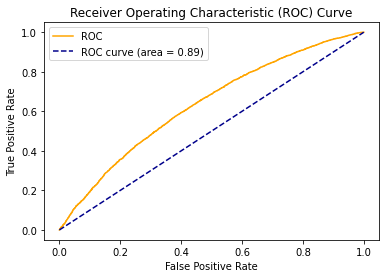

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [78]:
average_precision = average_precision_score(y_test, y_pred)
average_precision

0.8589118582750165

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.86')

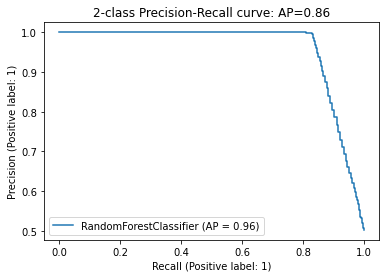

In [79]:
disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [80]:
import xgboost as xgb
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)

y_pred = my_model.predict(X_test)

[16:27:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7156641120361692

In [82]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dt_classifier.fit(X_train, y_train)  

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [83]:
accuracy

0.8011247725643712

In [84]:
pd.Series(clf.feature_importances_, index=X.columns)

CustomerID               0.033783
MonthlyRevenue           0.030141
MonthlyMinutes           0.031012
TotalRecurringCharge     0.022903
DirectorAssistedCalls    0.015901
                           ...   
Occupation_Self          0.000934
Occupation_Student       0.000605
MaritalStatus_No         0.004994
MaritalStatus_Unknown    0.004582
MaritalStatus_Yes        0.004585
Length: 838, dtype: float64

<AxesSubplot:>

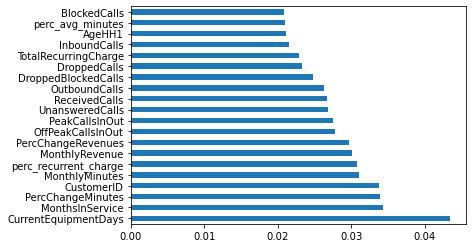

In [85]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')